# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information about medical appointments in Brazil. It contains various data about 100k+ appointments and the corresponding patients. Finally, it contains a flag whether the patient showed up or not. In this analysis, our main focus will be trying to investigate what are the main factors influencing the no-show behavior of a patient. The columns of this dataset are as follows:

  - **PatientId:** A column with the patient ID.  
  - **AppointmentId:** A column with the appointment ID.  
  - **Gender:** Male or Female written in abbreviated form "M" or "F".  
  - **ScheduledDay:** A timestamp with the date and time of scheduling the appointment and not the date of appointment itself. 
  - **AppointmentDay:** A timestamp with the date and time of the appointment itself.  
  - **Age:** The age of the patient.  
  - **Neighbourhood:** The neighbourhood where the appointment takes place.  
  - **Scholarship:**  Indicates whether or not the patient is enrolled in Brasilian welfare program.  
  - **Hipertension:** Indicates whether the patient has Hipertension or not.  
  - **Diabetes:** Indicates whether the patient has Daibetes or not.  
  - **Alcoholism:** Indicates whether the patient drinks alcohol or not.  
  - **Handcap:** Indicates whether the patient is handicapped or not and the severity of his disability.  
  - **SMS_received:** Indicates whether 1 or more messages sent to the patient or not.  
  - **No-show:** Indicates whether the patient actually showed up "No" or not"Yes".  
  
### Questions for Analysis
Below are some questions that we will try to answer during the analysis:
- Does the waiting time (time between scheduling and the appointment) affect the showing up? Long vs short waiting time from the day of schedule?  
- Does receiving an SMS affects showing up to the appointment?  
- Is there certain neighbourhoods where the patients do not show up?  
- Does age affect showing up?  
- Is there a more gender that is likely to show up over another?  
- Are people with a scholarship more likely to show up?  
- Does the appointment day (weekend/weekday) or time (early/late) affect showing up?  
- Does being alcoholic affects showing up?  
- Does being handicapped or the severity of disability affects showing up?  

These are some sample questions, I will answer some of these questions here but not all of them.

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    99% |████████████████████████████████| 10.4MB 5.3MB/s eta 0:00:011  2% |█                               | 296kB 10.6MB/s eta 0:00:01    19% |██████▏                         | 2.0MB 11.6MB/s eta 0:00:01    35% |███████████▎                    | 3.7MB 22.8MB/s eta 0:00:01    46% |███████████████                 | 4.9MB 23.8MB/s eta 0:00:01    62% |████████████████████            | 6.6MB 11.6MB/s eta 0:00:01    68% |█████████████████████▉          | 7.1MB 23.5MB/s eta 0:00:01    83% |██████████████████████████▊     | 8.7MB 10.9MB/s eta 0:00:01    88% |████████████████████████████▍   | 9.3MB 8.0MB/s eta 0:00:01    94% |██████████████████████████████▏ | 9.8MB 23.0MB/s eta 0:00:01    99% |███████████████████████████████▉| 10.4MB 8.0MB/s eta 0:00:01    100% |████████████████████████████████| 10.5MB 1.8MB/s 
    100% |████████████████████████████████| 13.4MB 716kB/s ta 0:00:011  2% |▊                               | 286kB 10.0MB/s eta 0:00:02    5% |█▉                              | 788kB 

In [2]:
# importing the relevant modules and libraries to this analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load the data, check for cleanliness, and then trim and clean it for analysis. The check for cleanliness and the cleaning itself will be done simultaneously.

In [3]:
# loading data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
# exploring data
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [5]:
# checking the dimensions of the dataframe
df.shape

(110527, 14)

>- The dataframe contains 110527 entry, one for each appointment and 14 columns as expected.
- First impression is that some column titles are not correct such as "Handcap" which should be "Handicap", also "Hipertension" needs to be "Hypertension".  
- The titles also need some adjustments to make it easier when handling them. The suggested approach is to let the titles in lowercase for simplicity and separated by underscore where applicable.

I will start the cleaning of the data in order to make it easier for the exploaration phase. I will start with adjusting column titles.

In [6]:
# adjusting some column titles spelling wise
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace = True)

In [7]:
# adjusting the columns titles to lowercase and "-" to "_" in the "No-show" column
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [8]:
# verifying the update
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [9]:
# adding an underscore "_" for column titles with two words
df.rename(columns = {'patientid': 'patient_id', 'appointmentid': 'appointment_id', 'scheduledday': 'scheduled_day', 'appointmentday': 'appointment_day'}, inplace = True)

In [10]:
# verifying the update
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


>All the edits needed for column titles are done.

I will then check if there are any missing values in the dataset.

In [11]:
# checking for null values
df.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

>No null/missing values were found.

Next, I will perform some analysis and cleaning for the types of each column to help me better perform the visualisation part.

In [12]:
#checking the types of data in each column
df.dtypes

patient_id         float64
appointment_id       int64
gender              object
scheduled_day       object
appointment_day     object
age                  int64
neighbourhood       object
scholarship          int64
hypertension         int64
diabetes             int64
alcoholism           int64
handicap             int64
sms_received         int64
no_show             object
dtype: object

>- "patient_id" and "appointment_id" are float and integer respectively but we will convert them to string because we won't perform any arithmetic operation on them.  
- "scheduled_day" and "appointment_day" are "strings" or "object"and they need to be "Datetime".  
- It's better to convert No-show column type to integer to make it consistent with the remaining columns indicating "yes" or "no".

In [13]:
# converting "patient_id" and "appointment_id" to string.
df[['patient_id', 'appointment_id']] = df[['patient_id', 'appointment_id']].astype(str)

In [14]:
# verifying the update
df[['patient_id', 'appointment_id']].dtypes

patient_id        object
appointment_id    object
dtype: object

For simplicity, we will trim the hours, minutes, and seconds from "appointment_day" and "shceduled_day".

In [15]:
# removing hours, minutes, and seconds
for c in ["appointment_day", "scheduled_day"]:
    df[c] = df[c].apply(lambda x: x.split("T")[0])

In [16]:
# converting "scheduled_day" and "appointment_day" to datetime
for c in ['appointment_day', 'scheduled_day']:
    df[c] = pd.to_datetime(df[c])

In [17]:
# verifying the update
df[['scheduled_day', 'appointment_day']].dtypes

scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
dtype: object

>Before converting the "no_show" column type to integer, to avoid confusion, I will change its name to "show" and change the values inside to:
- No = 1 indicating that the patient showed up
- Yes = 0 indicating that the patient didn't show up

In [18]:
# changing the "no_show" title to "show"
df.rename(columns = {'no_show': 'show'}, inplace = True)

In [19]:
# changing "No" to 1 and "Yes" to 0
df['show'].replace({'No' : '1', 'Yes' : '0'}, inplace = True)

In [20]:
# converting the column type to integer
df['show'] = df['show'].astype(int)

In [21]:
# checking the types once again to make sure everything is correct
df.dtypes

patient_id                 object
appointment_id             object
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
show                        int64
dtype: object

All types modifications and cleaning were done. Next, we will check for any dplicate rows in our dataset.

In [22]:
# checking for duplicate rows
df.duplicated().sum()

0

>No duplicate rows were found.

In [23]:
#checking unique values
df.nunique()

patient_id          62299
appointment_id     110527
gender                  2
scheduled_day         111
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hypertension            2
diabetes                2
alcoholism              2
handicap                5
sms_received            2
show                    2
dtype: int64

>We have lower unique number of patients compared to the whole dataset which means there are duplicates in the patient ID, however, this is normal because a patient can go to the hospital more than once in different days. 

>We have the same unique number of appointments as the whole dataset, which mean that we can drop this column as it won't affect the analysis. Just to make sure that this is ok, checking the duplicates in this column.

In [24]:
#Checking duplicates in the appointment ID column
df.duplicated('appointment_id').sum()

0

>No duplicates were found, hence, we can drop this column.

Deleting the appointment id column as it won't affect the data analysis process.

In [25]:
#droping the "appointment_id" column
df.drop('appointment_id', axis = 1, inplace = True)

In [26]:
# verifying the update
df.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,29872499824296.0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1


Exploring the data from a statistical approach.

In [27]:
# showing summary statistics to look for any irregularities
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


>- The quarter of the patients are relatively young people with an age less than or equal to 18 years old. 
- It seems that 50% of the patients are less than or equal to 37 years old. 75% have an age which is less than or equal 55 years.
- Minimum age is a negative number which means that some ages are in negative numbers.  
- The maximum age is 115 but this would be normal for data from the hospital.

Based on the findings above, we will search for the odd ages that are in negative numbers and we will remove them from the dataset.

In [28]:
# finding the number of patients with a negative age using query to get the count of patients registered with a negative age
negative_age = df.query('age < 0').shape[0]
negative_age

1

>Only one patient have a negative age. Let's check it and delete it from the data.

In [29]:
# checking this patient
df.query('age < 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
99832,465943158731293.0,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1


In [30]:
# droping this row
df.drop(99832, inplace = True)

In [31]:
# verifying the row is dropped
df[df['age'] < 0]

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show


The data was cleaned from rows containing negative age for patients.

>To answer the question of "Does the waiting time (time between scheduling and the appointment) affect the showing up? Long vs short waiting time from the day of schedule?" we will create a new column called "waiting_days" which represents the difference between the appointment day and the scheduling day.

In [32]:
# creating a column called "waiting_days"
df["waiting_days"] = df['appointment_day'] - df['scheduled_day']

In [33]:
# verifying the update
df.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_days
0,29872499824296.0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0 days


In [34]:
# changing the type to string in order to perform a split
df["waiting_days"] = df["waiting_days"].astype(str)

In [35]:
# removing the word "days"
df["waiting_days"] = df["waiting_days"].apply(lambda x: x.split(" ")[0].strip())

In [36]:
# changing the type to integer
df["waiting_days"] = df["waiting_days"].astype(int)

In [37]:
# verifying the update done
print(df['waiting_days'].dtypes)
df.head(10)

int64


,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_days
0,29872499824296.0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,558997776694438.0,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4262962299951.0,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,867951213174.0,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8841186448183.0,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0
5,95985133231274.0,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1,2
6,733688164476661.0,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0,2
7,3449833394123.0,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0,2
8,56394729949972.0,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,1,0
9,78124564369297.0,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1,2


>A column to represent waiting days was created and cleaned to just include the number of days.

Exploring the new column "waiting_days" from a statistical approach.

In [38]:
# showing summary statistics of this new column
df.waiting_days.describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

>We found that there are negative waiting days which seems illogical. These rows will be dropped.  
50% of the appointments have waiting days less than or equal to 4 which seems good. Also, 75% of appointments have less than 15 waiting days.  
The maximum waiting days is 179 days, which is clearly a very long time.

We will get the rows with negative waiting days and delete them.

In [39]:
# checking the number of rows with negative waiting days
df.query('waiting_days < 0').gender.count()

5

In [40]:
# droping these 5 rows
df.drop(df.query('waiting_days < 0').index, inplace = True)

In [41]:
# checking that these rows were dopped
df.query('waiting_days < 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,waiting_days


In [42]:
# saving this dataframe into a new one for the EDA
df_cl = df

### Conclusion based on Data Investigation
List of findings and issues addressed
- No null values were found.  
- Column titles need to be adjusted spelling wise and on the level of text format.  
- Appointment ID column can be dropped and it was dropped.  
- ScheduledDay and AppointmentDay are strings and need to be changed to Datetime.  
- Patient ID and Appointment ID should be changed to strings.  
- There is one negative age that need to be dropped.  
- No duplicate rows were found.  
- It's better to change the type of No-show column to be integer to make it consistent with other flagging columns and also change its name to "show" and change the values to be "No" = 1 and "Yes" = 0.  
- After creating a new column for waiting time in days, there were some negative waiting days.


### Data Cleaning
As mentioned previously, here are the data cleaning that was done
- Adjusting column titles. 
- Changing the type of "scheduled_day" and "appointment_day" to Datetime.  
- Changing the type of "patient_id" and "appointment_id" to strings.  
- Changing the title of "No-show" to "show" and adjusting the column value to be "No" = 1 and "Yes" = 0 to avoid confusion.
- Changing the type of No-show column to integer.  
- Droping the appointment ID column.  
- Droping the row containing negative age. 
- Creating a new column "waiting_days" to record the number of days a patient has to wait in order to go to hospital. We then cleaned this column by dropping 5 negative values.

<a id='eda'></a>
## Exploratory Data Analysis


We will first explore the distributions of the data we have to get some insights about what to do next.

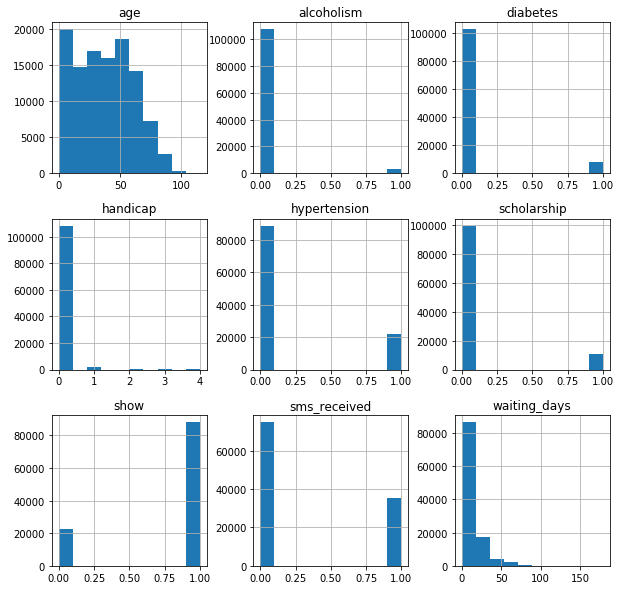

In [43]:
# exploring the distribution of each column
df_cl.hist(figsize = (10,10));

Here are some findings based on the histograms:
- We can see that the age of patients is relatively low.  
- Most of the patients are not alcoholic, diabete. A fair amount of patients have hypertensions compared to other diseases but generally speaking the proportion of patients with diseases is significantly low compared to the total. Hence, I won't use these factors in my investigation. 
- It is also obvious that most of the patients are not handicapped.  
- Most of the people have the scolarship.  
- The waiting days distribution is righ skewed which means that the mean is lower than the median and hence more than 50% of the waiting time is relatively normal waiting times.

In [44]:
# creating a function for bar graphs

def display_bar(bar_names, var_to_plot, title, xlabel, ylabel):
    """"
    bar_names: a list of titles given to each bar of the graph
    var_to_plot: a list of the corresponding variables to plot (counts for example)
    title, xlable, ylabel: plot properties
    """

    plt.figure(figsize = (8, 6))
    plt.bar(bar_names, var_to_plot)
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt.show()

### Research Question 1: Is there a more gender that is likely to show up over another?

One of the factors that may affect showing up is the gender. There might be some relation between showing/no showing and a certain gender. But first, let's explore the attendance in general to get an insight about the attendance behaviour in general.

Getting the counts, percentages and then visualising people who showed up and people who didn't.

In [45]:
# creating show and no show variables to get the counts
shw = df_cl[df_cl['show'] == 1].gender.count() # variable to count the total number of people who showed up
n_shw = df_cl[df_cl['show'] == 0].gender.count() # variable to count the total number of people who didn't show up

In [46]:
# getting the percentages
shw_percent = (shw / df_cl.shape[0]) * 100
no_show_percent = (n_shw / df_cl.shape[0]) * 100

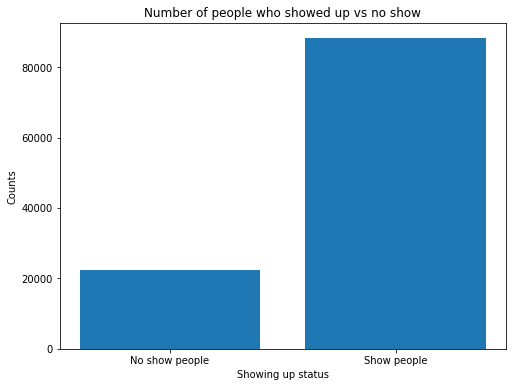

In [47]:
# creating the bar graph by calling the "display_bar" function.
display_bar(["Show people", "No show people"], [shw, n_shw], 'Number of people who showed up vs no show', 'Showing up status', 'Counts')

In [48]:
print("Percentage of people who showed up compared to the total is {}".format(shw_percent))

Percentage of people who showed up compared to the total is 79.81017182254956


We can see from the graph that almost 80% of patients who scheduled an appointment showed up. This is a good percentage and will make it worthy to explore this beaviour with the gender.

To better visualise the attendance in general, I will use a pie chart.

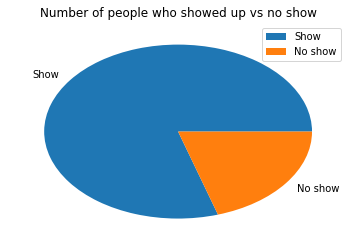

In [49]:
# exploring by a pie chart
percentages = [shw_percent, no_show_percent]
mylabels = ['Show', 'No show']
plt.title('Number of people who showed up vs no show')
plt.pie(percentages, labels = mylabels)
plt.legend();


Clearly, the number of people who showed up is higher than the number of people who didn't. Almost 80% of people showed up. Let's explore now by gender.

Here, I will get the counts, proportions, and then visualize patients' attendance per gender to see if there is an effect for the gender over the attendance.

In [50]:
# exploring the attendance by gender and showing up. Geting the counts first
gender_count = df_cl.groupby(['gender','show']).count()['patient_id']
gender_count

gender  show
F       0       14591
        1       57245
M       0        7723
        1       30962
Name: patient_id, dtype: int64

In [51]:
# get total counts for each gender
gender_totals = df_cl.groupby('gender').count()['patient_id']
gender_totals

gender
F    71836
M    38685
Name: patient_id, dtype: int64

In [52]:
# getting male proportions
male_proportions = gender_count['M'] / gender_totals['M']
male_proportions

show
0    0.199638
1    0.800362
Name: patient_id, dtype: float64

In [53]:
# getting female proportions
female_proportions = gender_count['F'] / gender_totals['F']
female_proportions

show
0    0.203115
1    0.796885
Name: patient_id, dtype: float64

We will visualise the relation between attendance and gender in a double bar graph. This type of graphs will help in comparing the male and female proportions in both statuses (shows vs no-shows).

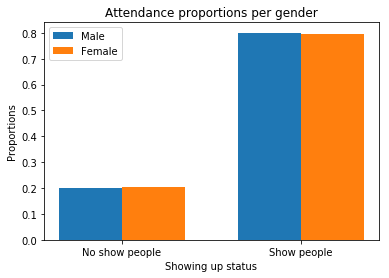

In [54]:
# plotting a double bar graph to compare
ind = np.arange(len(male_proportions)) #the x locations for the group
width = 0.35

#plot bars
plt.bar(ind, male_proportions, width, label = 'Male')
plt.bar(ind + width, female_proportions, width, label = 'Female')
  

# title and labels
plt.xlabel("Showing up status")
plt.ylabel("Proportions")
plt.title("Attendance proportions per gender")
locations = ind + width / 2  # xtick locations
labels = ['No show people', 'Show people']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

- This result confirms our findings above, that the attendance level is significantly higher than non attendance in general.   
- By exploring the propotions of males and females' attendance, we can see that it's almost the same proportion of males or females that show up.  
- Based on the graphs above, gender has no effect on showing up.

### Research Question 2: Does the waiting time (time between scheduling and the appointment) affect the showing up? Long vs short waiting time from the day of schedule?

Intuitively, the more we have waiting days, the higher the probability of not going to the scheduled appointment.  
We will try to explore this fact here and check, based on data, if the waiting time has an effect on showing up or not.  


Let's create a new column to divide the waiting days into some equally sized intervals to facilitate the analysis.

In [55]:
# creating bins of waiting days each one with 10 days interval
df_cl['days_bin'] = pd.cut(df_cl.waiting_days, 18, precision = -1, right = False)

In [56]:
# exploring the counts per each bin with a showing up status or not
df_cl.groupby('days_bin').show.value_counts()

days_bin        show
[0.0, 10.0)     1       64010
                0       10674
[10.0, 20.0)    1        9482
                0        4432
[20.0, 30.0)    1        7245
                0        3596
[30.0, 40.0)    1        3771
                0        1877
[40.0, 50.0)    1        1387
                0         737
[50.0, 60.0)    1         771
                0         371
[60.0, 70.0)    1         837
                0         336
[70.0, 80.0)    1         367
                0         170
[80.0, 90.0)    1         132
                0          51
[90.0, 100.0)   1         108
                0          29
[100.0, 110.0)  1          24
                0          10
[110.0, 120.0)  1          17
                0           2
[120.0, 130.0)  1           6
                0           1
[130.0, 140.0)  1           7
                0           6
[140.0, 150.0)  1           5
                0           4
[150.0, 160.0)  0           7
                1           4
[160.0, 170.0)  1  

Before getting a final conclusion to answer the question in this section, we will explore first the show up only vs waiting days. Also, we will explore the no show up only vs waiting days. This will help in getting some insights and identifying any patterns before combining both types (show and no show) in a single visualisation.

Starting with patients who showed up vs waiting days. We will get the percentages and then plot a bar graph to visualise the situation.

In [57]:
# getting the percentages of people who showed up per each bin
bins_show = df_cl.query('show == 1').groupby('days_bin').show.count()
bins_show = bins_show/df_cl.shape[0]

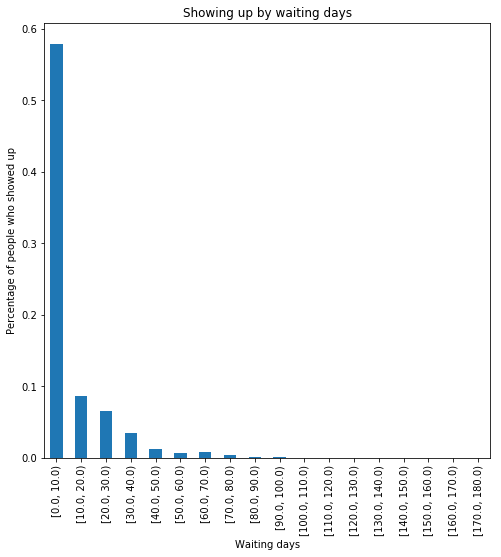

In [58]:
# plotting a bar graph for the percentages of people who showed up vs the number of waiting days
plt.figure(figsize = (8, 8))
bins_show.plot(kind = 'bar')
plt.title('Showing up by waiting days')
plt.xlabel('Waiting days')
plt.ylabel('Percentage of people who showed up');

First impression to see, is that the number of patients who show up to their appointment is higher when the waiting days are between 0 to 10 days. A little bit over 55% of the total patients fulfills this criteria. Clearly, we can see that wating days is a factor affecting showing up.

Now, we will move the no-shows patients, get their pecentages and display this vs waiting days.

In [59]:
# getting the percentages of people who didn't show up per each bin
bins_no_show = df_cl.query('show == 0').groupby('days_bin').show.count()
bins_no_show = bins_no_show/df_cl.shape[0]

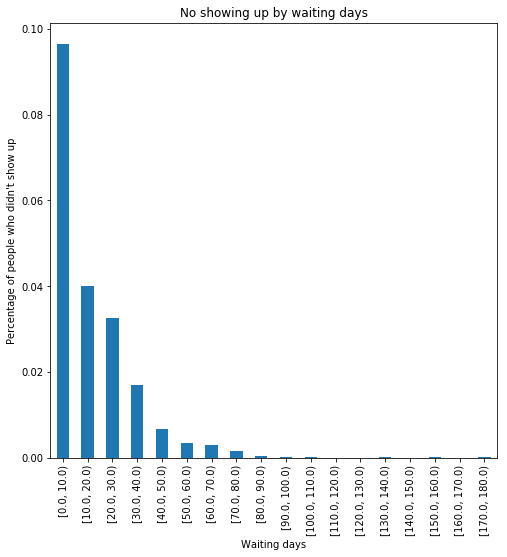

In [60]:
# plotting a bar graph for the percentages of people who didn't show up vs the number of waiting days
plt.figure(figsize = (8, 8))
bins_no_show.plot(kind = 'bar')
plt.title('No showing up by waiting days')
plt.xlabel('Waiting days')
plt.ylabel("Percentage of people who didn't show up");

Although this is a bit weird and wasn't expected; that the number of patients not showing up is higher with lower waiting days, the percentage of patients is lower than 10% of the total patients. A better explanation would be found when combining both findings into a single graph

Combining the two relations of the attendance with the waiting days. Here, we will explore with the counts vs waiting days by creating a double bar graph.

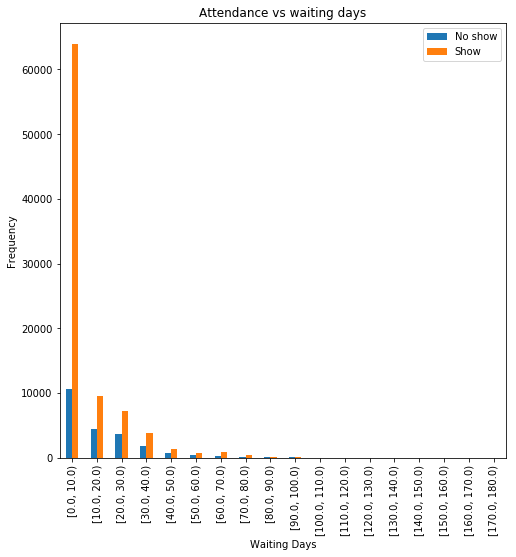

In [61]:
# creating a bar graph combining the two relations of the attendance with the waiting days.
df_cl.groupby('days_bin').show.value_counts().unstack().plot(kind = 'bar', figsize = (8, 8))
plt.title('Attendance vs waiting days')
plt.xlabel('Waiting Days')
plt.ylabel('Frequency')
plt.legend(['No show', 'Show']);

Clearly we can see that the more the waiting days are low, the more we have people showing up. What's unusual is that the more the waiting days increase, the more the no show up people decrease which seems illogical. However, this is lower number compared to the total people showing up.  
To conclude, as we thought intuitively, waiting days affect showing up to the appointment.
 

### Research question 3: Does receiving an SMS affects showing up to the appointment?

>Here we will check whether receiving an SMS was a factor for attendance by answering two questions.
- Out of people who showed up, who got an SMS?
- Out of people who got an SMS, who showed up? 

We will answer here the first question by exploring the who showed up and got an sms, getting their proportions, and then plotting a bar graph.

In [62]:
# exploring the attendance grouped by showing up and sms_received
attendance_counts = df_cl.groupby(['show', 'sms_received']).count()['patient_id']
attendance_counts

show  sms_received
0     0               12530
      1                9784
1     0               62509
      1               25698
Name: patient_id, dtype: int64

In [63]:
# getting the counts of people who showed up
show_totals = df_cl.groupby('show').count()['patient_id'][1]
show_totals

88207

In [64]:
# getting sms_received proportions of people who showed up
sms_receive_proportions = attendance_counts[1][1] / show_totals
sms_receive_proportions

0.29133742220005215

In [65]:
# getting sms not received proportions of people who showed up
sms_noreceive_proportions = attendance_counts[1][0] / show_totals
sms_noreceive_proportions

0.7086625777999479

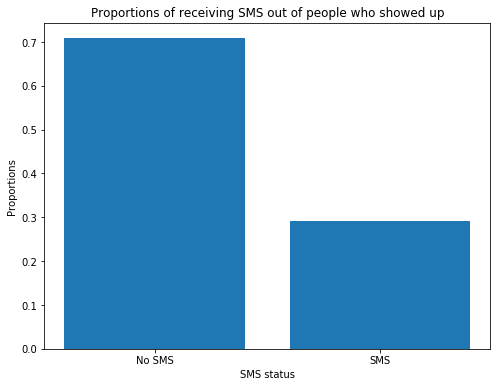

In [66]:
# calling the function to plot bar graph
display_bar(['SMS', 'No SMS'], [sms_receive_proportions, sms_noreceive_proportions], 'Proportions of receiving SMS out of people who showed up', 'SMS status', 'Proportions')

This was not expected at all, out of all people who showed up, the proportion of people who got an SMS (30%) is significantly lower than people who didn't get an SMS disregarding the gender. The first question doesn't give us an insight that an SMS is important for showing up.

Let's answer the second question "Out of people who got an SMS, who showed up?"

In [67]:
# getting the counts of people who received and SMS
sms_totals = df_cl.groupby('sms_received').count()['patient_id'][1]
sms_totals

35482

In [68]:
# getting show up proportion out of people who received an SMS
showup_proportions = attendance_counts[1][1] / sms_totals
showup_proportions

0.7242545516036301

In [69]:
# getting no show up proportion out of people who received an SMS
noshowup_proportions = attendance_counts[0][1] / sms_totals
noshowup_proportions

0.27574544839637

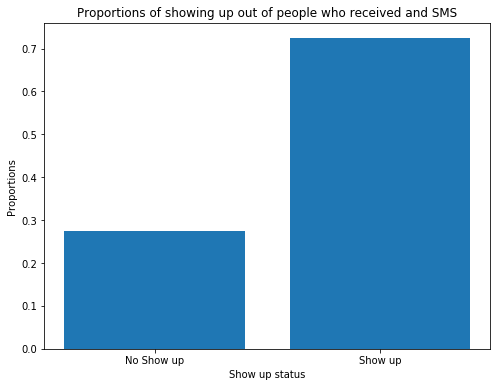

In [70]:
# calling the function to plot bar graph
display_bar(['Show up', 'No Show up'], [showup_proportions, noshowup_proportions], 'Proportions of showing up out of people who received and SMS', 'Show up status', 'Proportions')

On the level of receiving an SMS, clearly, most of the people who received an SMS showed up to the appointment but this is misleading because the amount of people who got an SMS is significantly low (only about 35k).

As a conclusion, we can't say that receiving an SMS was a factor affecting showing up.

### Research question 4: Does age affect showing up?

>Here we will check whether the age of the patients affects showing up or not as the age might be an important factor in the attendance.

Let's create a new column to divide the age of the patients into some equally sized intervals or age groups to facilitate the analysis.

In [71]:
# creating age groups each one with 10 years interval
df_cl['age_bin'] = pd.cut(df_cl.age, 12, precision = -1, right = False)

In [72]:
# exploring the counts per each bin with a showing up status or not
df_cl.groupby('age_bin').show.value_counts()

age_bin         show
[0.0, 10.0)     1       13991
                0        3483
[10.0, 20.0)    1        9679
                0        3256
[20.0, 30.0)    1        9246
                0        3049
[30.0, 40.0)    1       11748
                0        3289
[40.0, 50.0)    1       10043
                0        2651
[50.0, 60.0)    1       12996
                0        2825
[60.0, 70.0)    1       11102
                0        2023
[70.0, 80.0)    1        5360
                0         960
[80.0, 90.0)    1        3295
                0         625
[90.0, 100.0)   1         708
                0         146
[100.0, 110.0)  1          37
                0           4
[110.0, 120.0)  0           3
                1           2
Name: show, dtype: int64

Before getting a final conclusion to answer the question in this section, we will explore first the show up only vs age. Also, we will explore the no show up only vs age. This will help in getting some insights and identifying any patterns before combining both types (show and no show) in a single visualisation.

Starting with patients who showed up vs age. We will get the counts and then plot a bar graph to visualise the situation.

In [73]:
# getting the counts of people who showed up per each age group
age_show = df_cl.query('show == 1').groupby('age_bin').show.count()
age_show

age_bin
[0.0, 10.0)       13991
[10.0, 20.0)       9679
[20.0, 30.0)       9246
[30.0, 40.0)      11748
[40.0, 50.0)      10043
[50.0, 60.0)      12996
[60.0, 70.0)      11102
[70.0, 80.0)       5360
[80.0, 90.0)       3295
[90.0, 100.0)       708
[100.0, 110.0)       37
[110.0, 120.0)        2
Name: show, dtype: int64

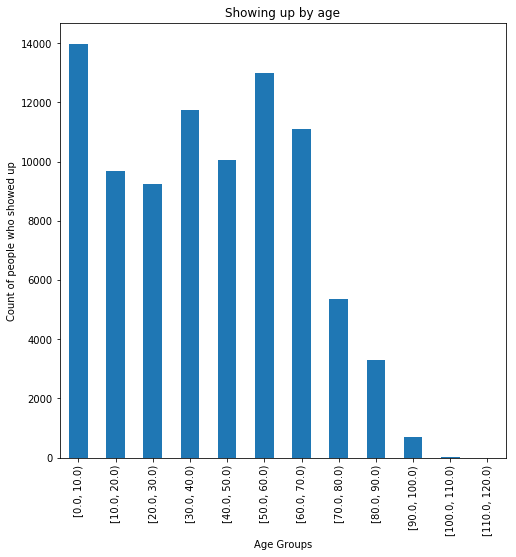

In [74]:
# plotting a bar graph for people who showed up vs the age
plt.figure(figsize = (8, 8))
age_show.plot(kind = 'bar')
plt.title('Showing up by age')
plt.xlabel('Age Groups')
plt.ylabel('Count of people who showed up');

We can see that the highest amount of patients showing up are patients with age between 0 and 10 years, so maybe kids are more potentially to show up compared to adults but we can't confirm this because it's just 14k compared to the total. 

Now, we will move the no-shows patients, get their counts and display this vs age.

In [75]:
# getting the counts of people who didn't show up per each bin
age_no_show = df_cl.query('show == 0').groupby('age_bin').show.count()
age_no_show

age_bin
[0.0, 10.0)       3483
[10.0, 20.0)      3256
[20.0, 30.0)      3049
[30.0, 40.0)      3289
[40.0, 50.0)      2651
[50.0, 60.0)      2825
[60.0, 70.0)      2023
[70.0, 80.0)       960
[80.0, 90.0)       625
[90.0, 100.0)      146
[100.0, 110.0)       4
[110.0, 120.0)       3
Name: show, dtype: int64

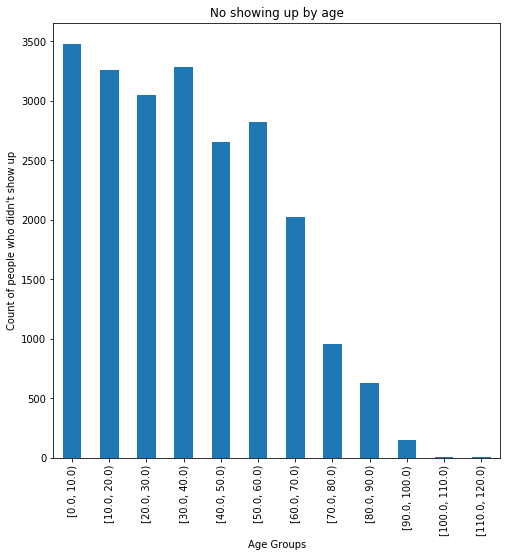

In [76]:
# plotting a bar graph for people who didn't show up vs the number of waiting days
plt.figure(figsize = (8, 8))
age_no_show.plot(kind = 'bar')
plt.title('No showing up by age')
plt.xlabel('Age Groups')
plt.ylabel("Count of people who didn't show up");

We can also see here that the highest no show amount is in the age group of 0 to 10 years, so no conclusions can be made that kids are more potentially to attend is a fact based on data. 

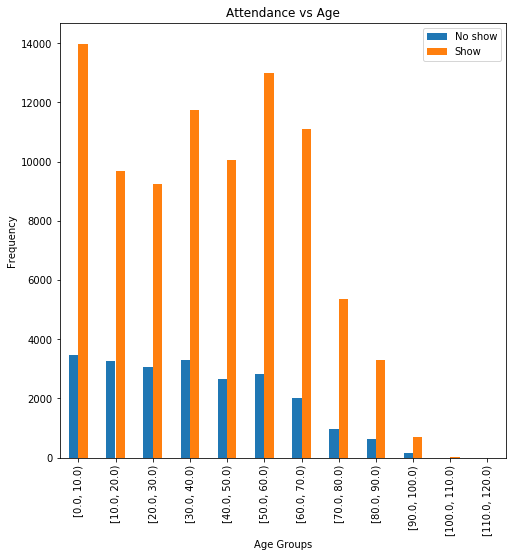

In [77]:
# creating a bar graph combining the two relations of the attendance with the age.
df_cl.groupby('age_bin').show.value_counts().unstack().plot(kind = 'bar', figsize = (8, 8))
plt.title('Attendance vs Age')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.legend(['No show', 'Show']);

We can see that the showing up status is high when the age is low but it fluctuates for other age groups. From 0 to 10 years is the age group with the highest show up and no-shows. For all age groups, showing up is always higher than non showing up. However, there is no particular pattern we can deduce from this analysis. Based on the data, age is not considered as a factor for showing up to the appointment.

<a id='conclusions'></a>
## Conclusions

In this analysis, I was trying to investigate the patients' showing up for their scheduled appointments.  
1.First, I explored the gender effect on attendance however, based on the findings, gender had no effect on showing up.  

2.Then, I tried to check whether waiting days affect the attendance and it showed up that the more the waiting days are low, the more we have people showing up which seems logical. However, what was unusual is that with waiting days increasing, the no show people were still decreasing.  

3.Third thing that was checked was receiving an SMS. Findings in this part were as follows:
- Out of all people who showed up, the proportion of people who got an SMS is significantly lower than people who didn't get an SMS disregarding the gender.
- On the level of receiving an SMS, clearly, most of the people who received an SMS showed up to the appointment but this is misleading because the amount of people who got an SMS is significantly low.

4.Last thing that was checked, the age effect on showing up. We could find that showing up status is high when the age is low however, there was no particular pattern we could deduce from the findings.  

More analysis could be done on the neighbourhood, or the type of diseases. We can also futher explore the data by checking whether there more attendace in the weekend or weekdays, whether there is a certain month of the year that has more attendance than another one.


### Limitations
One major limitation in this dataset was the "Handcap" column. This column wasn't describing what exactly it represents. In the data description, it was pointing out that it's a True/False column, however, it contained values that were above 1. After further investigation, it turns out that it represents the level of disability.

Another limitation is the SMS_received column which indicated that it contains the number of messages sent to the patient wheras it contained whether the patient received an SMS or not.


In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0